In [1]:
# Import necessary libraries
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt  
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df_apple = pdr.get_data_yahoo('AAPL', '2019-01-01')
df_google = pdr.get_data_yahoo('GOOG', '2019-01-01')
df_amazon = pdr.get_data_yahoo('AMZN', '2019-01-01')

In [3]:
# Isolate Adjusted close values
aapl = df_apple[['Adj Close']]
googl = df_google[['Adj Close']]
amzn = df_amazon[['Adj Close']]

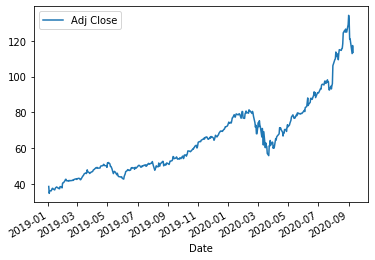

In [4]:
# Change value depending on stock being looked at
stock = aapl
stock.plot()

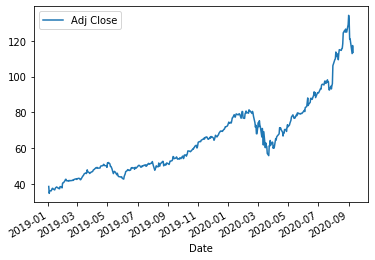

In [5]:
# Plot the Adjusted Close value of the selected stock
stock.plot()

In [6]:
# Add a prediction column to the data that uses the next day's value
stock["Prediction"] = stock[["Adj Close"]].shift(-1)
stock.tail()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Adj Close  Prediction
Date                              
2020-09-03  120.879997  120.959999
2020-09-04  120.959999  112.820000
2020-09-08  112.820000  117.320000
2020-09-09  117.320000  113.489998
2020-09-10  113.489998         NaN

In [7]:
# Create variable x and drop prediction column
X = np.array(stock.drop(["Prediction"],1))

# Remove the last row contaning NaN values
X = X[:-1]
print(X)

[[ 38.62909698]
 [ 34.781353  ]
 [ 36.2661438 ]
 [ 36.18542862]
 [ 36.87522888]
 [ 37.50143433]
 [ 37.62129974]
 [ 37.25193024]
 [ 36.69177246]
 [ 37.44273376]
 [ 37.90015793]
 [ 38.12519455]
 [ 38.3600235 ]
 [ 37.49898911]
 [ 37.65065002]
 [ 37.35221863]
 [ 38.58996201]
 [ 38.23282623]
 [ 37.83655167]
 [ 40.42210388]
 [ 40.71318436]
 [ 40.73275757]
 [ 41.88977051]
 [ 42.60648346]
 [ 42.62116241]
 [ 41.81394196]
 [ 41.86307907]
 [ 41.62232208]
 [ 41.98099136]
 [ 41.80656815]
 [ 41.95888519]
 [ 41.86553192]
 [ 41.99081421]
 [ 42.26104355]
 [ 42.02275467]
 [ 42.49196243]
 [ 42.8014946 ]
 [ 42.82606125]
 [ 42.95872116]
 [ 42.5361824 ]
 [ 42.98328018]
 [ 43.19947052]
 [ 43.12085342]
 [ 42.8727417 ]
 [ 42.37650681]
 [ 42.47722626]
 [ 43.94873047]
 [ 44.44251251]
 [ 44.63903809]
 [ 45.13527298]
 [ 45.72240067]
 [ 46.18916321]
 [ 45.82312775]
 [ 46.22355652]
 [ 47.92597961]
 [ 46.93351364]
 [ 46.36603165]
 [ 45.88699722]
 [ 46.29970932]
 [ 46.36112213]
 [ 46.66328812]
 [ 46.98019409]
 [ 47.66

In [8]:
# Create y variable
y = np.array(stock["Prediction"])

# Remove the last row contaning NaN values
y = y[:-1]
print(y)

[ 34.781353    36.2661438   36.18542862  36.87522888  37.50143433
  37.62129974  37.25193024  36.69177246  37.44273376  37.90015793
  38.12519455  38.3600235   37.49898911  37.65065002  37.35221863
  38.58996201  38.23282623  37.83655167  40.42210388  40.71318436
  40.73275757  41.88977051  42.60648346  42.62116241  41.81394196
  41.86307907  41.62232208  41.98099136  41.80656815  41.95888519
  41.86553192  41.99081421  42.26104355  42.02275467  42.49196243
  42.8014946   42.82606125  42.95872116  42.5361824   42.98328018
  43.19947052  43.12085342  42.8727417   42.37650681  42.47722626
  43.94873047  44.44251251  44.63903809  45.13527298  45.72240067
  46.18916321  45.82312775  46.22355652  47.92597961  46.93351364
  46.36603165  45.88699722  46.29970932  46.36112213  46.66328812
  46.98019409  47.6631279   47.98986053  48.0733757   48.39519119
  49.1567421   49.00934601  49.28448486  48.87423325  48.85457993
  48.94301605  48.9479332   49.90109634  50.08043289  50.24502563
  50.96971

In [9]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [10]:
# Create and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Calculate score using test data
lr_confidence = lr.score(X_test, y_test)
print("Score: ", lr_confidence)

# Assign predicted values to a variable for analysis
lr_pred_values = lr.predict(X_test)

# Calculate and print MAE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lr_pred_values))  
# Calculate and print MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lr_pred_values))  
# Calculate and print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_values)))


Score:  0.9898686063014848
Mean Absolute Error: 1.1795566168546738
Mean Squared Error: 4.304433385324772
Root Mean Squared Error: 2.0747128440641545


In [12]:
stock

Adj Close  Prediction
Date                              
2019-01-02   38.629097   34.781353
2019-01-03   34.781353   36.266144
2019-01-04   36.266144   36.185429
2019-01-07   36.185429   36.875229
2019-01-08   36.875229   37.501434
...                ...         ...
2020-09-03  120.879997  120.959999
2020-09-04  120.959999  112.820000
2020-09-08  112.820000  117.320000
2020-09-09  117.320000  113.489998
2020-09-10  113.489998         NaN

[427 rows x 2 columns]

In [13]:
stockMerge = stock[['Adj Close']]
stockMerge.head()

Adj Close
Date                 
2019-01-02  38.629097
2019-01-03  34.781353
2019-01-04  36.266144
2019-01-07  36.185429
2019-01-08  36.875229

In [14]:
# Display actual and predicted values side by side for comparison
lr_comparison = pd.DataFrame({"Adj Close":y_test.flatten(), "Predicted": lr_pred_values.flatten()})
print(lr_comparison)

     Adj Close  Predicted
0    79.419304  79.718343
1    58.388180  58.643362
2    87.272644  88.173597
3    66.790947  69.173767
4    50.364529  50.517105
..         ...        ...
166  55.595886  55.589814
167  49.156742  48.487685
168  81.432350  79.878578
169  69.180161  61.975362
170  38.589962  37.358661

[171 rows x 2 columns]


In [15]:
mergedData = pd.merge(stockMerge, lr_comparison, how='inner', on='Adj Close')

In [16]:
mergedData.head()

Adj Close  Predicted
0  34.781353  38.645489
1  36.266144  34.767762
2  36.185429  36.264123
3  36.875229  36.182779
4  37.621300  37.509039

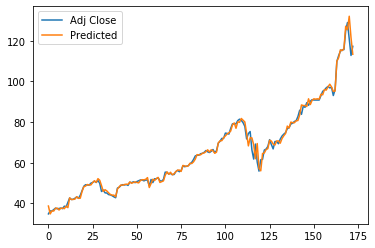

In [17]:
mergedData.plot()

In [18]:
# Create and train SVM model
svm = SVR(kernel="rbf", C=1e3, gamma=0.1)
svm.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
# Calculate and print score for Support Vector Machine model
svm_confidence = svm.score(X_test, y_test)
print(svm_confidence)

# Assign predicted values to a variable for analysis
svm_pred = svm.predict(X_test)

# Calculate and print MAE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svm_pred))  

# Calculate and print MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svm_pred))  

# Calculate and print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svm_pred)))

0.9882494952933388
Mean Absolute Error: 1.3474208517055148
Mean Squared Error: 4.992330399832396
Root Mean Squared Error: 2.234352344602882


In [20]:
# Display actual and predicted values side by side for comparison
svm_comparison = pd.DataFrame({"Actual":y_test.flatten(), "Predicted": svm_pred.flatten()})
print(svm_comparison)

        Actual  Predicted
0    79.419304  79.525336
1    58.388180  59.413134
2    87.272644  87.797064
3    66.790947  69.625970
4    50.364529  50.180935
..         ...        ...
166  55.595886  55.386537
167  49.156742  48.625914
168  81.432350  79.611492
169  69.180161  60.955498
170  38.589962  37.765449

[171 rows x 2 columns]


In [21]:
# Create and train Decision Tree model
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
# Calculate and print score for Decision Tree model
dtree_confidence = dtree.score(X_test, y_test)
print(dtree_confidence)

# Assign predicted values to a variable for analysis
dtree_pred = dtree.predict(X_test)

# Calculate and print MAE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtree_pred))  

# Calculate and print MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtree_pred))  

# Calculate and print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dtree_pred)))

0.9834953247194623
Mean Absolute Error: 1.7870171827624342
Mean Squared Error: 7.012191748298402
Root Mean Squared Error: 2.6480543325805086


In [23]:
# Display actual and predicted values side by side for comparison
dtree_comparison = pd.DataFrame({"Actual":y_test.flatten(), "Predicted": dtree_pred.flatten()})
print(dtree_comparison)

        Actual  Predicted
0    79.419304  79.009213
1    58.388180  58.304633
2    87.272644  89.363251
3    66.790947  69.526440
4    50.364529  48.603880
..         ...        ...
166  55.595886  52.889065
167  49.156742  48.603880
168  81.432350  79.009213
169  69.180161  61.550563
170  38.589962  37.702018

[171 rows x 2 columns]
